### Setup

In [126]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import *

# Baca data dari CSV
df = pd.read_csv('water_potability.csv')

# Hapus data yang ada nullnya 
df.dropna(inplace = True) 
  
# Tambah nama Kolom
df.columns= ["id","pH","Hardness","Solids","Chloramines","Sulfate","Conductivity",
               "OrganicCarbon","Trihalomethanes","Turbidity","Potability"]

#bikin jadi 2 data berdasarkan kolom Potability
df0 = df[df["Potability"]==0]
df1 = df[df["Potability"]==1]

### Soal 1
Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

In [127]:
#tipe data yang bersifat numerik
#accepted_data_type = ["int","float","complex"]

'''
mean 
median 
modus 
standar deviasi 
variansi 
range 
minimum 
maksimum 
kuartil 
IQR
skewness 
kurtosis
'''
description = ["Mean","Median","Modus","Standard Deviation","Variance","Range","Minimum","Maximum","Quartile","IQR","Skewness","Kurtosis"]


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataDesc = pd.DataFrame(columns = ['description','id','pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
cols = df.columns[1:]
list = [[] for _ in range(12)
for i in range(12):
    list[i].append(description[i])

for col in cols:
    list[0].append(df[col].mean())
    list[1].append(df[col].median())
    list[2].append(df[col].mode())
    list[3].append(df[col].std())
    list[4].append(df[col].var())
    list[5].append(df[col].min())
    list[6].append(df[col].max())
    list[7].append(df[col].quantile(0.25))
    list[8].append(df[col].quantile(0.75))
    list[9].append(df[col].skew())
    list[9].append(df[col].skew())
    list[10].append(df[col].kurt())
tempDf = pd.Series(mean, index = ['description','id','pH', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'OrganicCarbon', 'Trihalomethanes', 'Turbidity', 'Potability'])
dataDesc = dataDesc.append(tempDf, ignore_index = True)
print(dataDesc)
'''
print(df.describe())
print("Mean:")
print(df1.mean())
print("")
print("Median")
print(df1.median())
print()
print("Mode:")
for column in df1:
    print('{:<16}'.format(column),end="")
    print('{:>13}'.format(df1[column].mode().loc[0].round(5)))
print("")
print("Standar Deviasi:")
print(df1.std())
print("")
print("Variansi:")
print(df1.var())
print("")
print("Maksimum:")
print(df1.max())
print("")
print("Minimum:")
print(df1.min())
print("")
print("Range:")
print(df1.max()-df1.min())
print("Kuartil 1:")
print(df1.quantile(.25))
print("")
print("Kuartil 2:")
print(df1.quantile(.50))
print("")
print("Kuartil 3:")
print(df1.quantile(.75))
print("")
print("Interquartile Range:")
print(df1.quantile(.75) - df.quantile(.25))
print("")
print("Skewness:")
print(df1.skew())
print("")
print("Kurtosis:")
print(df1.kurt())
'''
'''
Cara Print 2
print("Mean:")
print(df.groupby('Potability').mean())
print("")
'''

SyntaxError: '[' was never closed (487109937.py, line 26)

### Soal 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.


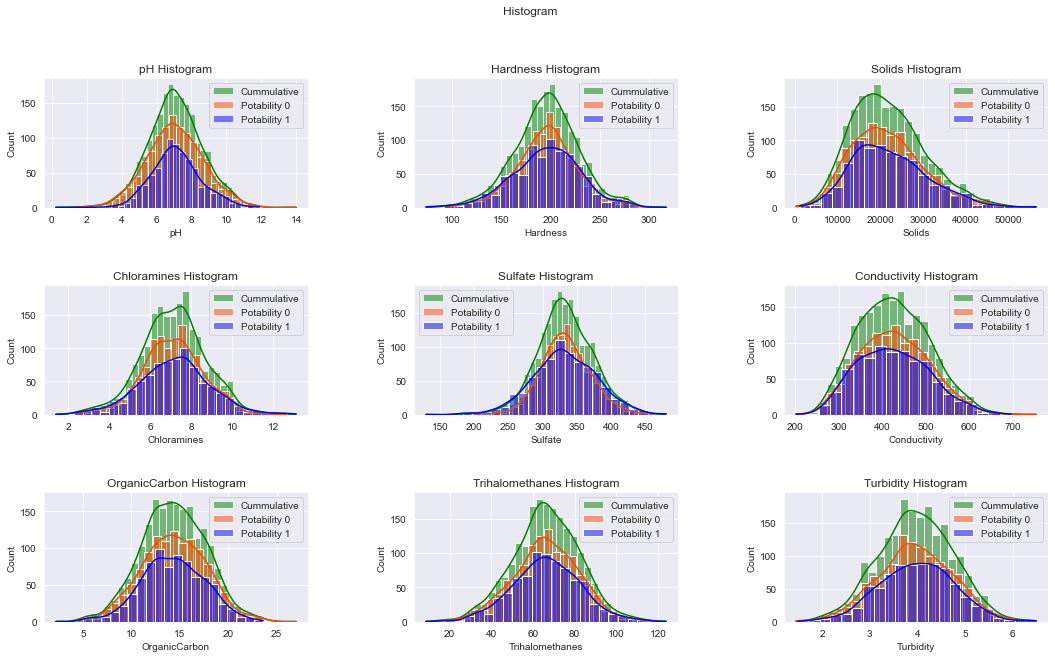

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
 

fig.suptitle('Histogram')
 
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.color_palette("rocket_r", as_cmap=True)   
        sns.histplot(ax=axes[i//3, i % 3], data=df, x=cols,color = 'green' ,label="Cummulative", kde=True).set_title(cols + " Histogram")
        sns.histplot(ax=axes[i//3, i % 3], data=df0, x=cols, color="orangered", label="Potability 0", kde=True)
        sns.histplot(ax=axes[i//3, i % 3], data=df1, x=cols,color = 'blue' ,label="Potability 1", kde=True)
        
        axes[i//3, i % 3].legend()
        i += 1
plt.subplots_adjust(hspace=0.6, wspace = 0.4)
plt.legend()
plt.show()

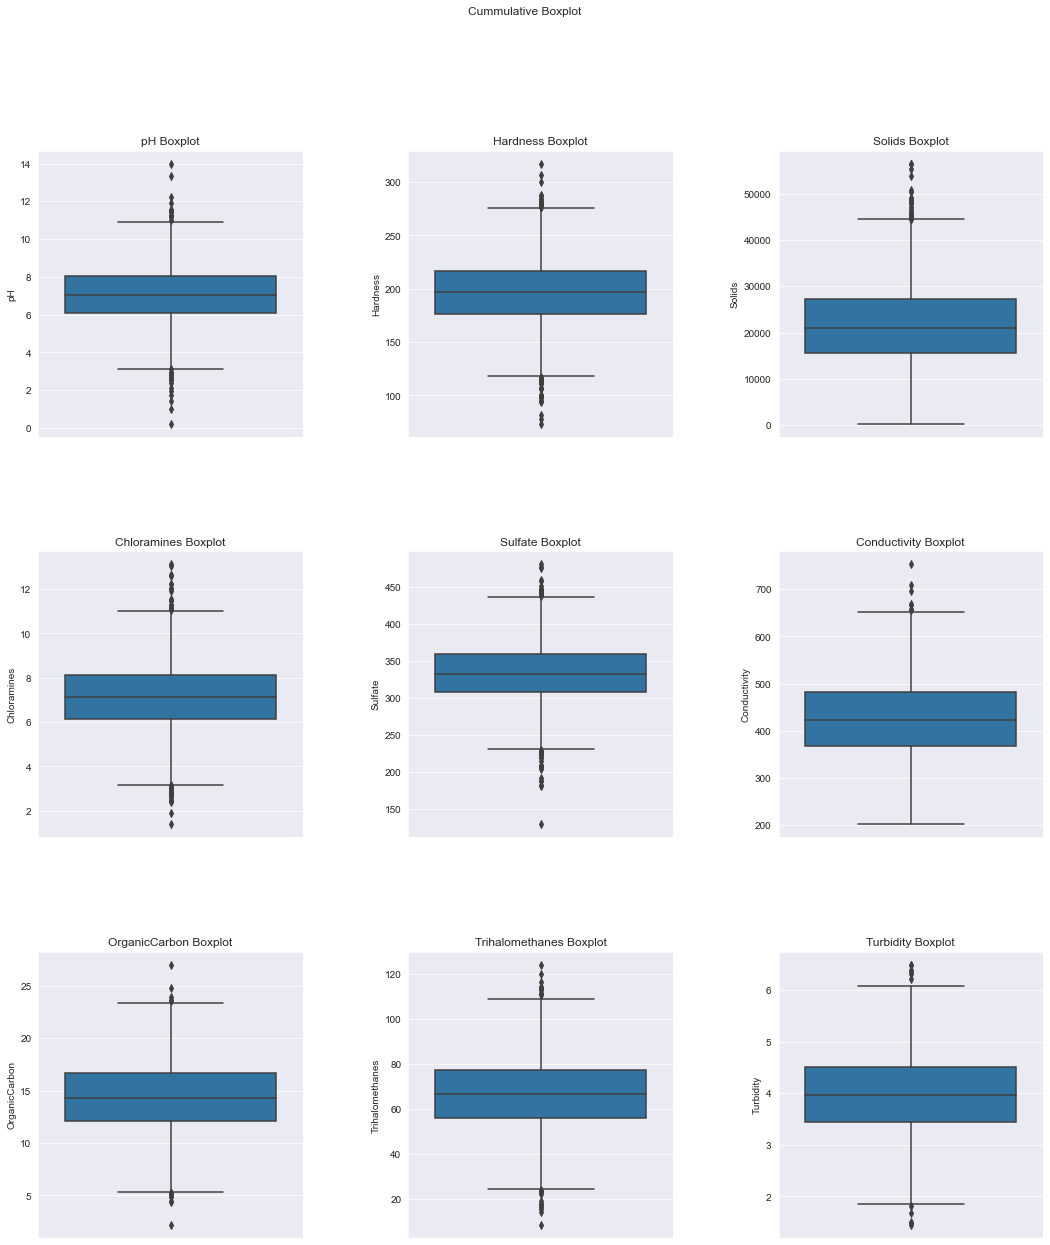

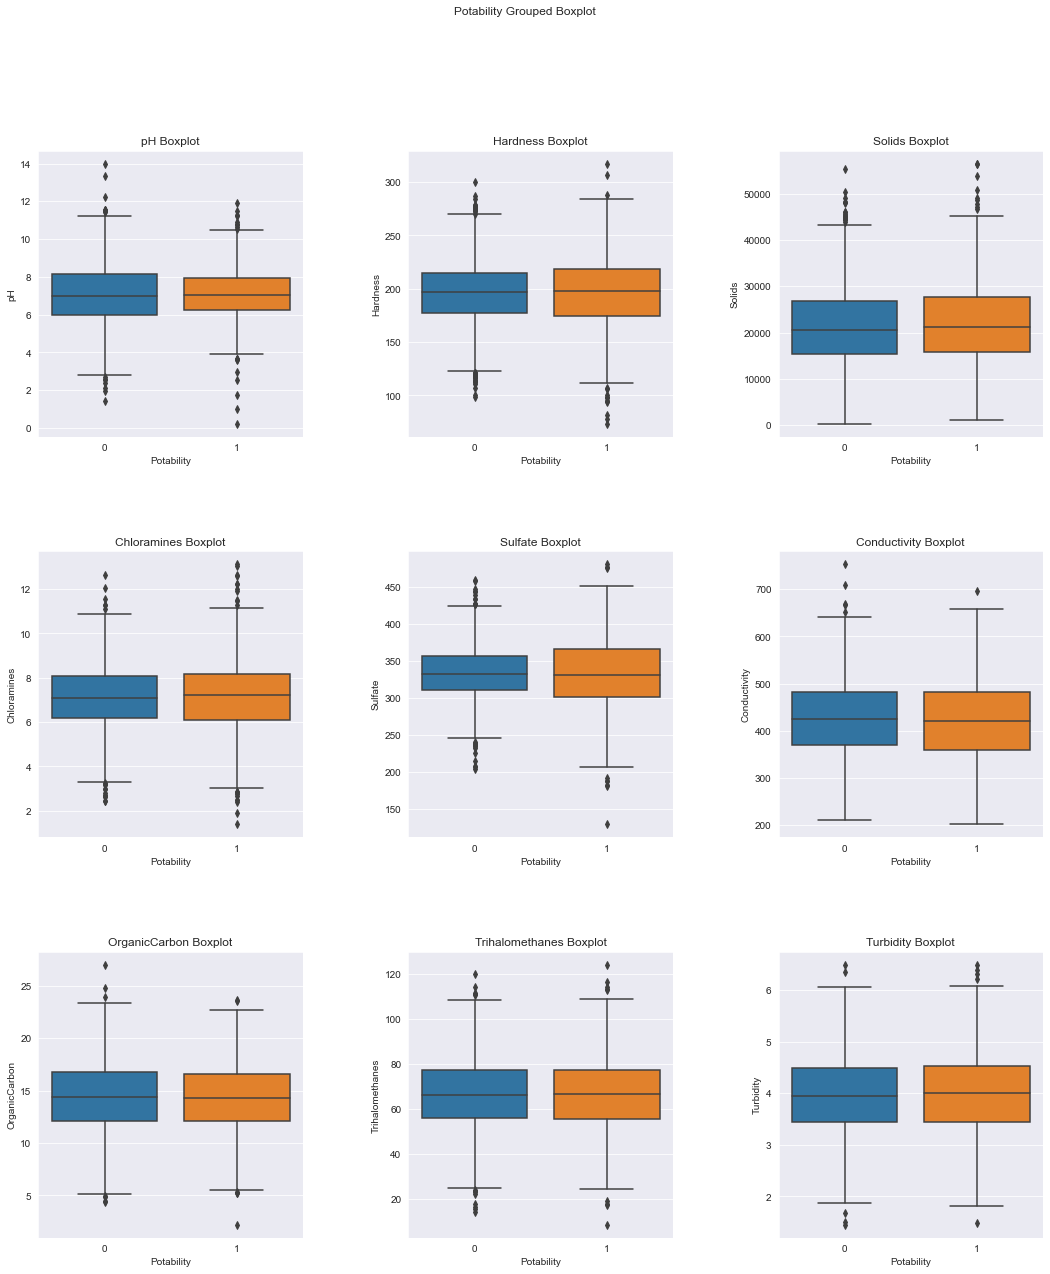

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 20))
 
fig.suptitle('Cummulative Boxplot')
 
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.boxplot(ax=axes[i//3, i % 3], y=cols, data=df).set_title(cols + " Boxplot")
        i += 1
plt.subplots_adjust(hspace=0.4, wspace = 0.4)

fig, axes = plt.subplots(3, 3, figsize=(18, 20))
 
fig.suptitle('Potability Grouped Boxplot')
 
i=0
for cols in df:
    if(df[cols].dtype in accepted_data_type):
        sns.boxplot(ax=axes[i//3, i % 3], x="Potability", y=cols, data=df).set_title(cols + " Boxplot")
        i += 1
plt.subplots_adjust(hspace=0.4, wspace = 0.4)


### Soal 3
Menggunakan Test Shapiro (referensi: https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411) didapat hasil (dengan keterangan pemerhatian dari boxplot dan histogram diagram) 
1. pH               : Tidak berdistribusi normal, terlihat terdapat banyak pencilan pada boxplot
2. Hardness         : Tidak berdistribusi normal, terlihat banyak pencilan pada boxplot
3. Solids           : Tidak berdistribusi normal, terlihat negative skewed pada histogram
4. Chloramines      : Tidak berdistribusi normal, terlihat terlalu landai pada histogram dan tidak memperlihatkan distribusi normal.
5. Sulfate          : Tidak berdistribusi normal, terlihat tidak simetris dan banyak pencilan
6. Conductivity     : Tidak berdistribusi normal, terlihat positived skewed pada histogram
7. OrganicCarbon    : Berdistribusi normal 
8. Trihalomethanes  : Berdistribusi normal 
9. Turbidity        : Berdistribusi normal 

Pada hasil pemrograman di bawah diberikan QQ plot distributsi normal beserta nilai evaluasi Shapiro Normality Test

=================id================
Shapiro Test : stat=0.955, p=0.0000000000 Tidak


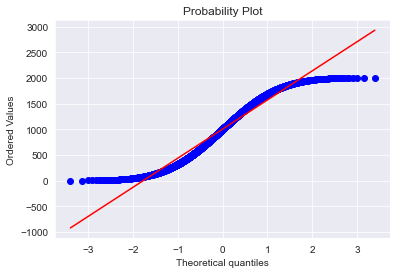

=================pH================
Shapiro Test : stat=0.996, p=0.0000850717 Tidak


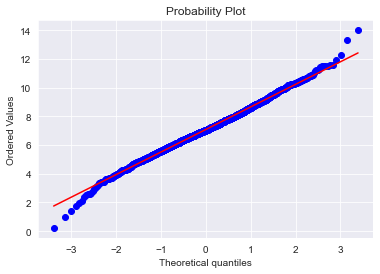

=================Hardness================
Shapiro Test : stat=0.996, p=0.0000137997 Tidak


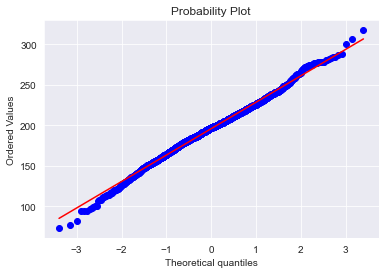

=================Solids================
Shapiro Test : stat=0.979, p=0.0000000000 Tidak


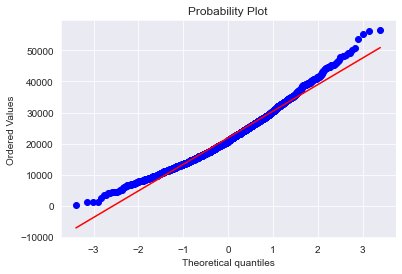

=================Chloramines================
Shapiro Test : stat=0.996, p=0.0000364615 Tidak


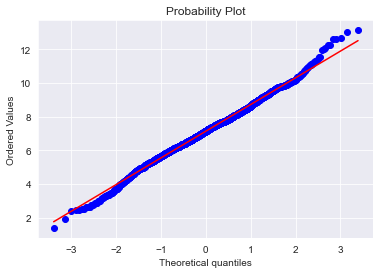

=================Sulfate================
Shapiro Test : stat=0.995, p=0.0000008844 Tidak


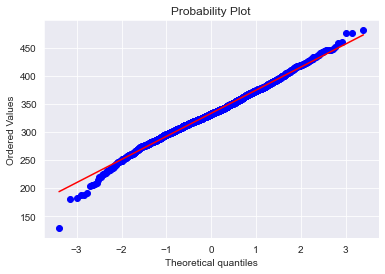

=================Conductivity================
Shapiro Test : stat=0.993, p=0.0000000225 Tidak


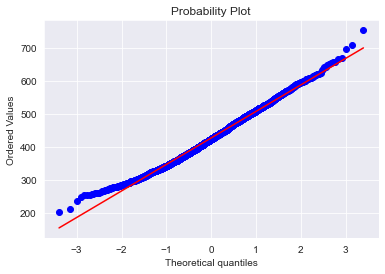

=================OrganicCarbon================
Shapiro Test : stat=0.999, p=0.6474561691 Normal


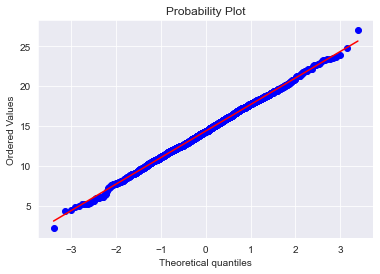

=================Trihalomethanes================
Shapiro Test : stat=0.999, p=0.1062980294 Normal


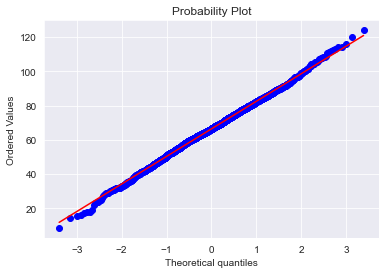

=================Turbidity================
Shapiro Test : stat=0.999, p=0.7022392750 Normal


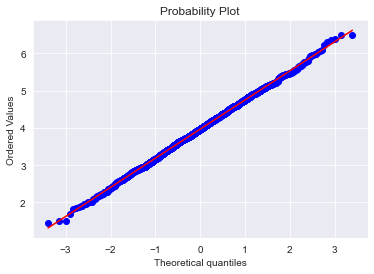

=================Potability================
Shapiro Test : stat=0.623, p=0.0000000000 Tidak


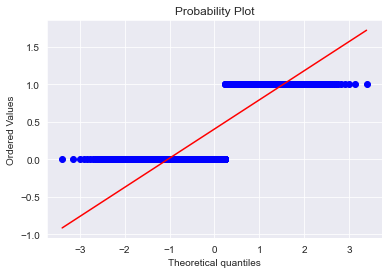

In [ ]:
from scipy.stats import shapiro, probplot
import pylab

def print_result(stat,p):
    print("stat=%.3f, p=%.10f" %(stat, p), end=" ")
    if p>0.05:
        print("Normal")
    else:
        print("Tidak")

for cols in df:
    print('================='+cols+'================')
    data = df[cols]
    stat, p = shapiro(data)
    print("Shapiro Test : ", end="")
    print_result(stat, p)
    probplot(data, dist="norm", plot=pylab)
    pylab.show()



### Soal 4
Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Nilai Rata-rata pH di atas 7?

b. Nilai Rata-rata Hardness tidak sama dengan 205?

c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan
10%?

e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

Sumber yang Kami Gunakan Untuk Menentukan Jenis Test yang digunakan: https://sonalake.com/latest/an-introduction-to-hypothesis-testing/

### Soal 4.a
Nilai Rata-rata pH di atas 7?
1. H0: pH = 7.0
2. H1: pH > 7.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  0.006851179743798378
6. Tolak H0

Kesimpulan: Rata-rata pH di atas 7

Soal 4.a
Using Scipy Stats Ttest_1samp
1. H0: pH = 7.0
2. H1: pH > 7.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. t-value =  2.4671463768689637
   p-value =  0.006851179743798378
6. Reject H0

Manually
1. H0: pH = 7.0
2. H1: pH > 7.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. t-value =  2.4671463768689637
   p-value =  0.006851179743798378
6. Reject H0


<AxesSubplot:>

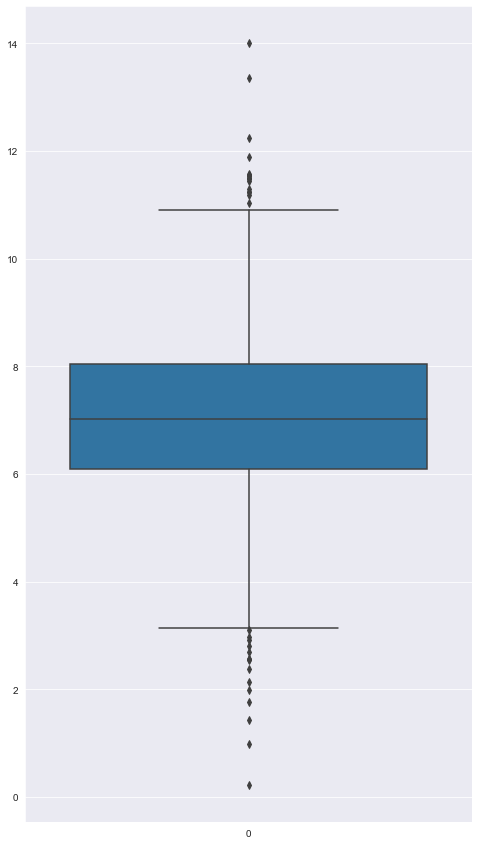

In [ ]:
from scipy import stats

print("Soal 4.a")
mean = 7.0
print("Using Scipy Stats Ttest_1samp")
print("1. H0: pH =", mean)
print("2. H1: pH >", mean)
alpha = 0.05
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value,p_value=stats.ttest_1samp(df["pH"],mean, alternative='greater')
print("5. t-value = ",float(t_value))
print("   p-value = ",float(p_value))
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

print("\nManually")
print("1. H0: pH =", mean)
print("2. H1: pH >", mean)
alpha = 0.05
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value = (df["pH"].mean() - mean)/(df["pH"].std() / np.sqrt(len(df["pH"])))
print("5. t-value = ",float(t_value))
p_value = stats.t.sf(np.abs(t_value), len(df["pH"])-1)
print("   p-value = ",p_value)
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["pH"])

### Soal 4.b
Nilai Rata-rata Hardness tidak sama dengan 205?
1. H0: Hardness = 205.0
2. H1: Hardness != 205.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  3.951588599098364e-34
6. Tolak H0

Kesimpulan: Hardness tidak sama dengan 205

Soal 4.b
1. H0: Hardness = 205.0
2. H1: Hardness != 205.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. t-value =  -12.410522788078028
   p-value =  3.951588599098364e-34
6. Reject H0

Manually
1. H0: Hardness = 205.0
2. H1: Hardness != 205.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. t-value =  -12.410522788078028
   p-value =  3.951588599098364e-34
6. Reject H0


<AxesSubplot:>

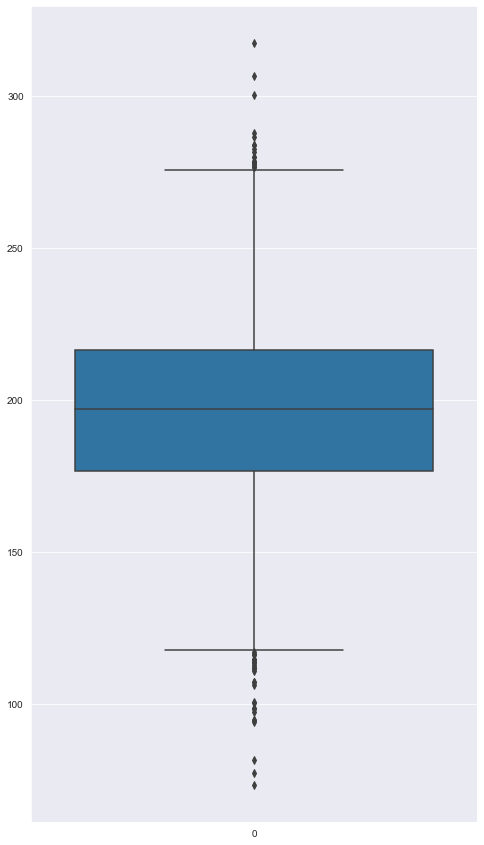

In [ ]:
from scipy import stats

print("Soal 4.b")
mean = 205.0
print("1. H0: Hardness =", mean)
print("2. H1: Hardness !=", mean)
alpha = 0.05 
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value,p_value=stats.ttest_1samp(df["Hardness"],mean, alternative = "two-sided")
print("5. t-value = ",float(t_value))
print("   p-value = ",float(p_value))
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

print("\nManually")
print("1. H0: Hardness =", mean)
print("2. H1: Hardness !=", mean)
alpha = 0.05 
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value = (df["Hardness"].mean() - mean)/(df["Hardness"].std() / np.sqrt(len(df["Hardness"])))
print("5. t-value = ",float(t_value))
p_value = stats.t.sf(np.abs(t_value), len(df["Hardness"])-1) * 2
print("   p-value = ",p_value)
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Hardness"])

### Soal 4.c
Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

1. H0: Solids = 21900.0
2. H1: Solids != 21900.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. p-value =  0.5373441230987632
6. Tidak menolak H0

Kesimpulan: Rata-rata 100 barus pertama kolom Solids 21900

Soal 4.c
1. H0: Solids = 21900.0
2. H1: Solids != 21900.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. t-value =  0.6189909029696404
   p-value =  0.5373441230987632
6. Can't / Don't Reject H0

Manually
1. H0: Solids = 21900.0
2. H1: Solids != 21900.0
3. α = 0.05
4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai
5. t-value =  0.6189909029696403
   p-value =  0.5373441230987632
6. Can't / Don't Reject H0


<AxesSubplot:>

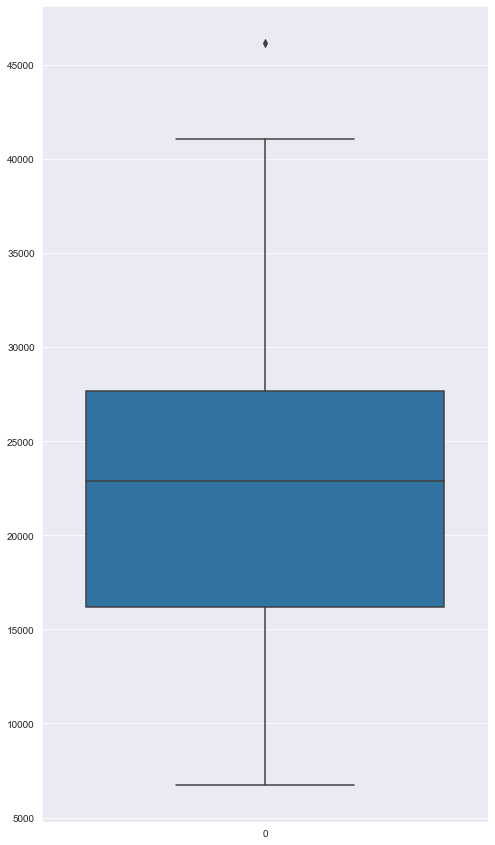

In [ ]:
from scipy import stats

print("Soal 4.c")
mean = 21900.0
print("1. H0: Solids =",mean)
print("2. H1: Solids !=", mean)
alpha = 0.05 
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value,p_value=stats.ttest_1samp(df["Solids"].head(100),mean, alternative="two-sided")
print("5. t-value = ",float(t_value))
print("   p-value = ",float(p_value))
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")


print("\nManually")
print("1. H0: Solids =",mean)
print("2. H1: Solids !=", mean)
alpha = 0.05 
print("3. α =",alpha)
print("4. 1-Sample T-Test karena membandingkan Rata-rata sebuah sample dengan suatu nilai")
t_value = (df["Solids"].head(100).mean() - mean)/(df["Solids"].head(100).std() / np.sqrt(100))
print("5. t-value = ",float(t_value))
p_value = stats.t.sf(np.abs(t_value), 100-1) * 2
print("   p-value = ",p_value)
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Solids"].head(100))

### Soal 4.d
Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan
10%?
1. H0: Proporsi Conductivity yang Lebih dari 450 = 0.1
2. H1: Proporsi Conductivity yang Lebih dari 450 != 0.1
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  2.256275910701225e-139
6. Tolak H0

2009
Soal 4.d
1. H0: Proporsi Conductivity yang Lebih dari 450 = 0.1
2. H1: Proporsi Conductivity yang Lebih dari 450 != 0.1
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. z-value =  40.463878020757406
   p-value =  0.0
6. Reject H0

Manually
1. H0: Proporsi Conductivity yang Lebih dari 450 = 0.1
2. H1: Proporsi Conductivity yang Lebih dari 450 != 0.1
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. z-value =  40.46387802075741
6. Reject H0


<AxesSubplot:>

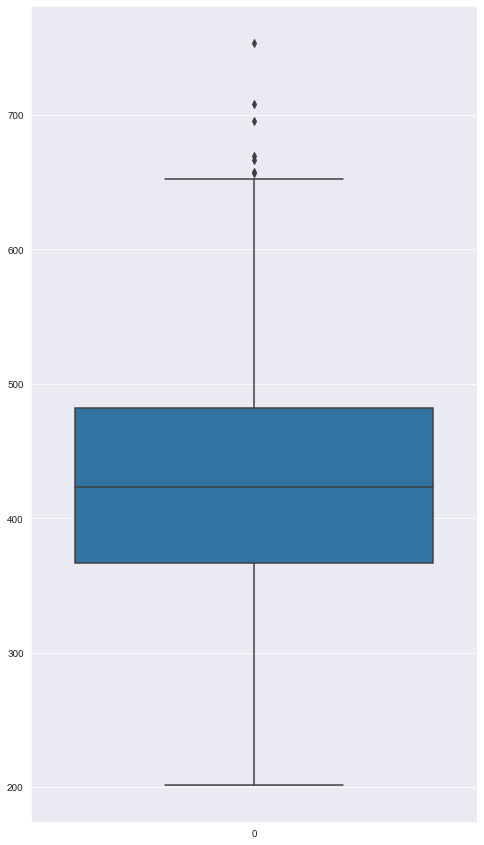

In [128]:
from statsmodels.stats.proportion import proportions_ztest

null_hypothesis = 0.1
conduct = df["Conductivity"]
sample_success = conduct[conduct>450.0].count()
sample_size = df["Conductivity"].count()
alpha = 0.05

print(sample_size)
print("Soal 4.d")
print("1. H0: Proporsi Conductivity yang Lebih dari 450 =", null_hypothesis)
print("2. H1: Proporsi Conductivity yang Lebih dari 450 !=", null_hypothesis)
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
z_value,p_value= proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='two-sided', prop_var = null_hypothesis)
print("5. z-value = ",float(z_value))
print("   p-value = ",float(p_value))
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

print("\nManually")
print("1. H0: Proporsi Conductivity yang Lebih dari 450 =", null_hypothesis)
print("2. H1: Proporsi Conductivity yang Lebih dari 450 !=", null_hypothesis)
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
z_value = (sample_success - sample_size*null_hypothesis)/(np.sqrt(sample_size*null_hypothesis*(1-null_hypothesis)))
p_value = stats.norm.sf(abs(z_value))*2
print("5. z-value = ",float(z_value))
print("   p-value = ",float(p_value))
if p_value<alpha:
    print("6. Reject H0")
else:
    print("6. Can't / Don't Reject H0")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Conductivity"])

### Soal 4.e
1. H0: Proporsi Trihalomethanes yang Lebih dari 40 = 0.05
2. H1: Proporsi Trihalomethanes yang Lebih dari 40 < 0.05
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  0.2898326945860968
6. Tolak H1

Soal 4.e
1. H0: Proporsi Conductivity yang Lebih dari 40 = 0.05
2. H1: Proporsi Conductivity yang Lebih dari 40 < 0.05
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  0.5796653891721936
6. Tolak H1


<AxesSubplot:>

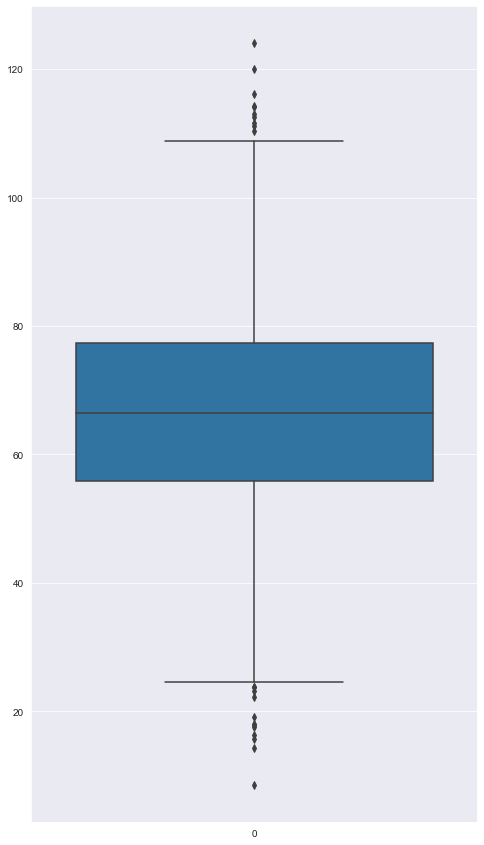

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

null_hypothesis = 0.05
Trihalomethanes = df["Trihalomethanes"]
sample_success = Trihalomethanes[Trihalomethanes<40].count()
sample_size = df["Trihalomethanes"].count()
alpha = 0.05

print("Soal 4.e")
print("1. H0: Proporsi Conductivity yang Lebih dari 40 =", null_hypothesis)
print("2. H1: Proporsi Conductivity yang Lebih dari 40 <", null_hypothesis)
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
t_value,p_value= proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='two-sided')
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")
plt.figure(figsize=(8,15))
sns.boxplot(data=df["Trihalomethanes"])

### Soal 5
Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan
juga boxplotnya untuk kolom/bagian yang bersesuaian.

a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah
rata-rata kedua bagian tersebut sama?

b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom.
Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada,
proporsi nilai yang sama di bagian akhir Turbidity ?

### Soal 5.a
1. H0: Rata-rata bagian awal = Rata-rata bagian akhir
2. H1: Rata-rata bagian awal != Rata-rata bagian akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.0368965161184979
6. Tolak H0

In [ ]:
from scipy.stats import ttest_ind

midpoint = int(df["Sulfate"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]
awal = awal["Sulfate"]
akhir = akhir["Sulfate"]

#null_hypotesis = perbedaan rata-rata dari kedua sample
null_hypothesis = 0
alpha = 0.05

print("Soal 5.a")
print("1. H0: Rata-rata bagian awal = Rata-rata bagian akhir")
print("2. H1: Rata-rata bagian awal != Rata-rata bagian akhir")
print("3. α =",alpha)
print("4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama")
t_value,p_value= ttest_ind(awal,akhir, equal_var=True)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

Soal 5.a
1. H0: Rata-rata bagian awal = Rata-rata bagian akhir
2. H1: Rata-rata bagian awal != Rata-rata bagian akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.0368965161184979
6. Tolak H0


### Soal 5.b

In [ ]:
from scipy.stats import ttest_ind

midpoint = int(df["OrganicCarbon"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]
awal = awal["OrganicCarbon"]
akhir = akhir["OrganicCarbon"]

#null_hypotesis = perbedaan rata-rata dari kedua sample
null_hypothesis = 0
alpha = 0.05

print("Soal 5.a")
print("1. H0: Rata-rata bagian awal - Rata-rata bagian akhir = 0.15")
print("2. H1: Rata-rata bagian awal - Rata-rata bagian akhir != 0.15")
print("3. α =",alpha)
print("4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama")
t_value,p_value= ttest_ind(awal,akhir, equal_var=True)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

Soal 5.a
1. H0: Rata-rata bagian awal - Rata-rata bagian akhir = 0.15
2. H1: Rata-rata bagian awal - Rata-rata bagian akhir != 0.15
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.15292905436033075
6. Tolak H1


### Soal 5.c

In [ ]:
from scipy.stats import ttest_ind

end = df["Sulfate"].count()
awal = df.iloc[:100,:]
akhir = df.iloc[end-100:,:]
awal = awal["Chloramines"]
akhir = akhir["Chloramines"]
alpha = 0.05

print("Soal 5.c")
print("1. H0: Rata-rata 100 data awal = Rata-rata 100 data akhir")
print("2. H1: Rata-rata 100 data awal != Rata-rata 100 data akhir")
print("3. α =",alpha)
print("4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama")
t_value,p_value= ttest_ind(awal,akhir, equal_var=True)
print("5. p-value = ",float(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

Soal 5.c
1. H0: Rata-rata 100 data awal = Rata-rata 100 data akhir
2. H1: Rata-rata 100 data awal != Rata-rata 100 data akhir
3. α = 0.05
4. 2-Sample paired T-test karena membandingkan rata-rata 2 sample dari populasi yang sama
5. p-value =  0.44676017233305654
6. Tolak H1


### Soal 5.d

Soal 4.d
1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir
2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal > bagian akhir
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
5. p-value =  0.5623474531912108
6. Tolak H1


<AxesSubplot:>

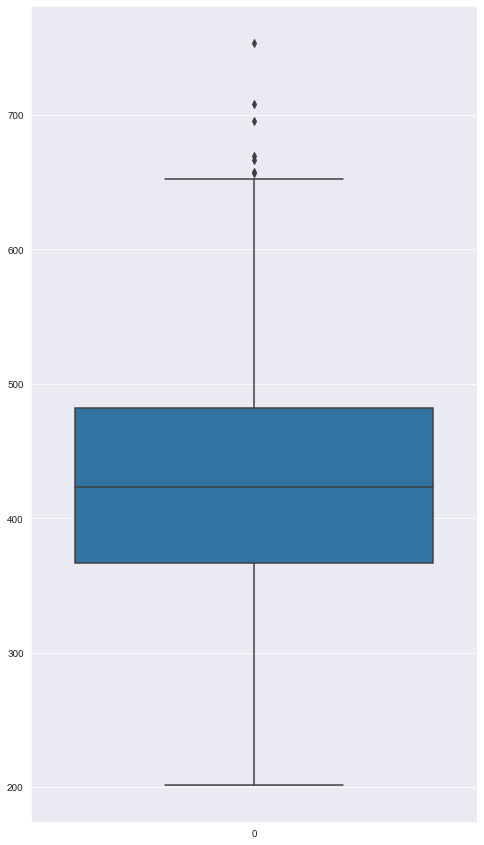

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

midpoint = int(df["Turbidity"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]
awal_success = awal[awal["Turbidity"]>4.0]
awal_success_count = awal_success["Turbidity"].count()
akhir_success = akhir[akhir["Turbidity"]>4.0]
akhir_success_count = akhir_success["Turbidity"].count()
sample_size = df["Turbidity"].count()
alpha = 0.05
successes = np.array([awal_success_count, akhir_success_count])
samples = np.array([awal["id"].count(), akhir["id"].count()])

print("Soal 4.d")
print("1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir")
print("2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal > bagian akhir")
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
stat, p_value = proportions_ztest(count=successes, nobs=samples,  alternative='larger')
print("5. p-value = ",(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Conductivity"])

### Soal 5.e

1709.4468186165016 1682.7330644425087
Soal 5.e
1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir
2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal != bagian akhir
3. α = 0.05
4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai
1.0329099504846848
5. p-value =  0.3040662566644321
6. Tolak H1


<AxesSubplot:>

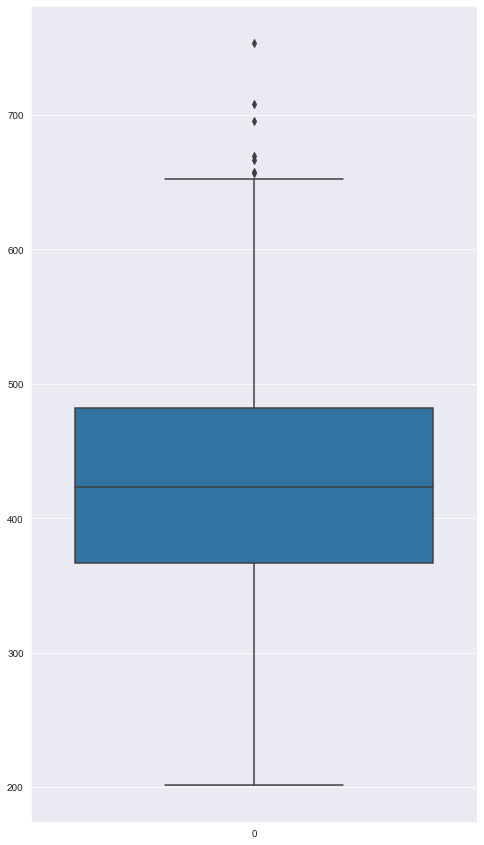

In [ ]:
import scipy.stats

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

midpoint = int(df["Sulfate"].count()/2)
awal = df.iloc[:midpoint,:]
akhir = df.iloc[midpoint:,:]

print(awal["Sulfate"].var(),akhir["Sulfate"].var())


print("Soal 5.e")
print("1. H0: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal = bagian akhir")
print("2. H1: Proporsi nilai Turbidity yang Lebih dari 4 pada bagian awal != bagian akhir")
print("3. α =",alpha)
print("4. 1-Sample Z-test karena membandingkan proporsi sebuah variable dengan suatu nilai")
stat, p_value = f_test(awal["Turbidity"], akhir["Turbidity"])
print(stat)
print("5. p-value = ",(p_value))
if p_value<alpha:
    print("6. Tolak H0")
else:
    print("6. Tolak H1")

plt.figure(figsize=(8,15))
sns.boxplot(data=df["Conductivity"])